# Homework 03 - Nonstandard Evaluation and Git

## Nonstandard Evaluation


### Question 1
Imagine we have a data frame called `data`, with a `type` column. Which one works and why?\
Function 1:
```
group_and_tally <- function(df, column){
    df %>% group_by({{ column }}) %>% tally();
}
group_and_tally(data, type);
```

Function 2:
```
group_and_tally <- function(df, column){
    df %>% group_by(column) %>% tally();
}
group_and_tally(data, type);
```

In [ ]:
The function 1 works and function 2 does not work in this case because in function 1, group_by({{ column }})
    R groups data by the column "type" but, in function 2, group_by(column), R tries to look up for a column with name "column".   

## Git
For the questions below, please add the commands you used to complete these steps.

### Question 2
Set up your git repo on your local computer. If you already make a git repo on GitHub, but it isn’t on your local computer - clone it.

In [ ]:
cd ~/Documents
mkdir -p BIOS512            
cd BIOS512            

git clone git@github.com:shila-b/Assignments.git . 

### Question 3
Set up your SSH key.

In [ ]:
git config --global user.name "shila-b"
git config --global user.email "shilabhatta7@mail.com"

ssh-keygen -t ed25519 -C "shilabhatta7@gmail.com"

eval "$(ssh-agent -s)"

ssh-add ~/.ssh/id_ed25519

cat ~/.ssh/id_ed25519.pub

ssh -T git@github.com

### Question 4
a) Add a HW2 directory to your git repo through the terminal with a HW.md file that says "This is for homework 2."


In [ ]:
cd ~/Documents/BIOS512
mkdir HW2
echo "This is for homework 2." > HW2/HW.md

git commit -m "Add HW2 folder with HW.md"
git push origin main

b) *Add* HW2.md to the staging area. Then, use the command to see which files have been modified, staged for commit, or are untracked. What does it show?
They should copy paste the terminal response after git status, and show that key used the commands below.

In [ ]:
git add HW2/HW.md
git status

Terminal Response
[On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   HW2/HW.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.DS_Store]


c) Save file changes to the main branch.

In [ ]:
git commit -m "Add HW2 folder with HW.md"

git push origin main

d) Now, edit the HW2.md file to give it a title.

In [ ]:
nano HW2/HW.md

e) Use the command that compares current, unsaved changes to the main branch. What does it say?\
\
f) Use the command that checks the status of the working directory and the staging area *again*. What does it say?\
\
g) Once again, add HW2.md to the staging area and save the file changes to the main branch. Then, get use the command that gives you project history and paste the output in your homework.

In [ ]:
e. 
git diff

diff --git a/HW2/HW.md b/HW2/HW.md
index e202d7f..c11d14b 100644
--- a/HW2/HW.md
+++ b/HW2/HW.md
@@ -1,2 +1,4 @@
 # Homework 2
+
 This is for homework 2.

f. 
git status

(base) shila@Mac BIOS512 % git status
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   HW2/HW.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.DS_Store

no changes added to commit (use "git add" and/or "git commit -a")


g. 
git add HW2/HW.md
git commit -m "Add title to HW2.md"
git push origin main

git log --oneline

23ed28c (HEAD -> main, origin/main, origin/HEAD) Add title to HW2.md
6a9dee8 Add title to HW2.md
6ddca2e Add title to HW2.md
1fd841a Add HW2 folder with HW.md
315902b Initial commit
(base) shila@Mac BIOS512 % 


h) Do some searching... What `git` command will provide you documentation on other commands? Use that command to find documentation on `git log` and `git show`. What does `--since` mean in regards to `git log`? Copy and paste what is written in the documentation.

In [ ]:
The primary Git command for accessing documentation on other Git commands is git help.

git log
       Shows the commit logs.

       List commits that are reachable by following the parent links from the
       given commit(s), but exclude commits that are reachable from the one(s)
       given with a ^ in front of them. The output is given in reverse
       chronological order by default.

git show
      Shows one or more objects (blobs, trees, tags and commits).

--since=<date1> limits to commits newer than <date1>, and using it with
       --grep=<pattern> further limits to commits whose log message has a line
       that matches <pattern>), unless otherwise noted.
 --since-as-filter=<date>
           Show all commits more recent than a specific date. This visits all
           commits in the range, rather than stopping at the first commit
           which is older than a specific date.

## Tidyverse

Note: Please make sure Binder is set up correctly to run this section. You can follow the instructions here: https://github.com/rjenki/BIOS512. 

**Please show your code for this section!** Before completing this section, please run the following.

In [1]:
library(tidyverse)
if (!dir.exists("intermediate")) dir.create("intermediate", recursive = TRUE)
if (!exists("mdpre")) mdpre <- function(x) { print(x) }
if (!exists("ggmd"))  ggmd  <- function(p) { print(p) }

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Question 5

Download the patient_names.csv and patient_properties.csv files from Canvas and read them into R. Manually set the date columns to be date variables. Print the first 10 observations of each.

In [2]:
# Read data
patient_names <- read_csv("~/Documents/BIOS512/HW2/Data/patient_names.csv") %>%
  mutate(
    BIRTHDATE = as.Date(BIRTHDATE, format = "%m/%d/%y"),
    DEATHDATE = as.Date(DEATHDATE, format = "%m/%d/%y")
  )

patient_properties <- read_csv("~/Documents/BIOS512/HW2/Data/patient_properties.csv")

# Print first 10 observations
head(patient_names, 10)
head(patient_properties, 10)


Rows: 974 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ID, BIRTHDATE, DEATHDATE, FIRST, LAST, CITY, STATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3896 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): ID, property, value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE
<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NA,Nikita578,Erdman779,Quincy,Massachusetts
6e5ae27c-8038-7988-e2c0-25a103f01bfa,2040-02-19,NA,Zane918,Hodkiewicz467,Boston,Massachusetts
8123d076-0886-9007-e956-d5864aa121a7,2058-06-04,NA,Quinn173,Marquardt819,Quincy,Massachusetts
770518e4-6133-648e-60c9-071eb2f0e2ce,2028-12-25,2017-09-29,Abel832,Smitham825,Boston,Massachusetts
f96addf5-81b9-0aab-7855-d208d3d352c5,2028-12-25,2014-02-23,Edwin773,Labadie908,Boston,Massachusetts
8e9650d1-788a-78f9-4a28-d08f7f95354a,2028-12-25,NA,Frankie174,Oberbrunner298,Boston,Massachusetts
183df435-4190-060e-8f8e-bf63c572b266,2057-11-08,NA,Eilene124,Walsh511,Cambridge,Massachusetts
720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NA,Lowell343,Price929,Quincy,Massachusetts
217851b0-5f47-d376-18b9-0fe4ba77207e,2054-03-06,NA,Adrian111,Gleason633,Boston,Massachusetts


ID,property,value
<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,MARITAL,M
5605b66b-e92d-c16c-1b83-b8bf7040d51f,RACE,white
5605b66b-e92d-c16c-1b83-b8bf7040d51f,ETHNICITY,nonhispanic
5605b66b-e92d-c16c-1b83-b8bf7040d51f,GENDER,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,MARITAL,M
6e5ae27c-8038-7988-e2c0-25a103f01bfa,RACE,white
6e5ae27c-8038-7988-e2c0-25a103f01bfa,ETHNICITY,nonhispanic
6e5ae27c-8038-7988-e2c0-25a103f01bfa,GENDER,M
8123d076-0886-9007-e956-d5864aa121a7,MARITAL,M


### Question 6
In the data frame pulled from patient_properties, you'll notice that the data is long, not wide. Do a pivot to make the properties their own columns. Print the first 10 observations after you do so.

In [4]:
# pivot wider to make the properties their own columns
patient_properties_wide <- patient_properties %>%
  pivot_wider(
    names_from = property,
    values_from = value
  )

# Print first 10 observations
head(patient_properties_wide, 10)

ID,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,S,black,hispanic,M


### Question 7
Perform a left join of the names and properties_wide data frames by the ID column and print the first 10 rows.

In [5]:
# Left join by ID
patients_leftjoin <- patient_names %>%
  left_join(patient_properties_wide, by = "ID")

# Print first 10 rows
head(patients_leftjoin, 10)

ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NA,Nikita578,Erdman779,Quincy,Massachusetts,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,2040-02-19,NA,Zane918,Hodkiewicz467,Boston,Massachusetts,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,2058-06-04,NA,Quinn173,Marquardt819,Quincy,Massachusetts,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,2028-12-25,2017-09-29,Abel832,Smitham825,Boston,Massachusetts,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,2028-12-25,2014-02-23,Edwin773,Labadie908,Boston,Massachusetts,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,2028-12-25,NA,Frankie174,Oberbrunner298,Boston,Massachusetts,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,2057-11-08,NA,Eilene124,Walsh511,Cambridge,Massachusetts,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NA,Lowell343,Price929,Quincy,Massachusetts,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,2054-03-06,NA,Adrian111,Gleason633,Boston,Massachusetts,S,black,hispanic,M


### Question 8
Notice something interesting about the names in our data set. Fix the name formatting and print the first 10 observations.

In [6]:
# Combine first and last name
patients_leftjoin <- patients_leftjoin %>%
  mutate(
    FIRST = str_remove(FIRST, "[0-9]+$"),
    LAST  = str_remove(LAST, "[0-9]+$")
  )

# Print first 10 observations
head(patients_leftjoin, 10)

ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NA,Nikita,Erdman,Quincy,Massachusetts,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,2040-02-19,NA,Zane,Hodkiewicz,Boston,Massachusetts,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,2058-06-04,NA,Quinn,Marquardt,Quincy,Massachusetts,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,2028-12-25,2017-09-29,Abel,Smitham,Boston,Massachusetts,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,2028-12-25,2014-02-23,Edwin,Labadie,Boston,Massachusetts,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,2028-12-25,NA,Frankie,Oberbrunner,Boston,Massachusetts,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,2057-11-08,NA,Eilene,Walsh,Cambridge,Massachusetts,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NA,Lowell,Price,Quincy,Massachusetts,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,2054-03-06,NA,Adrian,Gleason,Boston,Massachusetts,S,black,hispanic,M


### Question 9
Using a for statement to loop through the categorical variables (excluding name and ID), print the counts of each unique value in descending order, using the mdpre() function for formatting.

In [7]:
# List of categorical variables (excluding ID and FULL_NAME)
cat_vars <- c("CITY", "STATE", "MARITAL", "RACE", "ETHNICITY", "GENDER")

# Loop through categorical variables
for (var in cat_vars) {
  cat("###", var, "\n")   # print variable name as a heading
  
  patients_leftjoin %>%
    count(.data[[var]]) %>%
    arrange(desc(n)) %>%
    mdpre()
}

### CITY 
# A tibble: 29 × 2
   CITY           n
   <chr>      <int>
 1 Boston       541
 2 Quincy        80
 3 Cambridge     45
 4 Revere        42
 5 Chelsea       39
 6 Weymouth      37
 7 Somerville    25
 8 Hingham       22
 9 Winthrop      22
10 Brookline     17
# ℹ 19 more rows
### STATE 
# A tibble: 1 × 2
  STATE             n
  <chr>         <int>
1 Massachusetts   974
### MARITAL 
# A tibble: 5 × 2
  MARITAL     n
  <chr>   <int>
1 M         782
2 S         189
3 Fine        1
4 male        1
5 NA          1
### RACE 
# A tibble: 7 × 2
  RACE         n
  <chr>    <int>
1 white      680
2 black      163
3 asian       90
4 other       16
5 hawaiian    13
6 native      11
7 asiann       1
### ETHNICITY 
# A tibble: 4 × 2
  ETHNICITY       n
  <chr>       <int>
1 nonhispanic   781
2 hispanic      190
3 nonhispani      2
4 hispani         1
### GENDER 
# A tibble: 5 × 2
  GENDER     n
  <chr>  <int>
1 M        493
2 F        478
3 Female     1
4 Male       1
5 female     1


### Question 10
If you see any weird values, get rid of the ones that don't make sense, and combine the ones that are formatted wrong. Don't forget ot check the dates! Print the new tables for categorical values, and print the date ranges.

In [8]:
library(dplyr)  
library(stringr)

patients_clean <- patients_leftjoin %>%
  mutate(
      
    # MARITAL STATUS
    MARITAL = case_when(
      MARITAL %in% c("M", "Married") ~ "Married",
      MARITAL %in% c("S", "Single")  ~ "Single",
        TRUE ~ NA_character_
        ),
    
    # GENDER
    GENDER = case_when(
      GENDER %in% c("female", "Female", "F") ~ "Female",
      GENDER %in% c("M", "Male") ~ "Male",
      TRUE ~ NA_character_
    ),
    
    # Capitalize RACE, ETHNICITY, STATE
    RACE = str_to_title(RACE),
    ETHNICITY = str_to_title(ETHNICITY),
    STATE = str_to_title(STATE)
  )


cat_vars <- c("CITY", "STATE", "MARITAL", "RACE", "ETHNICITY", "GENDER")

for (var in cat_vars) {
  cat("###", var, "\n")
  
  patients_clean %>%
    count(.data[[var]]) %>%
    arrange(desc(n)) %>%
    mdpre()
}

### CITY 
# A tibble: 29 × 2
   CITY           n
   <chr>      <int>
 1 Boston       541
 2 Quincy        80
 3 Cambridge     45
 4 Revere        42
 5 Chelsea       39
 6 Weymouth      37
 7 Somerville    25
 8 Hingham       22
 9 Winthrop      22
10 Brookline     17
# ℹ 19 more rows
### STATE 
# A tibble: 1 × 2
  STATE             n
  <chr>         <int>
1 Massachusetts   974
### MARITAL 
# A tibble: 3 × 2
  MARITAL     n
  <chr>   <int>
1 Married   782
2 Single    189
3 NA          3
### RACE 
# A tibble: 7 × 2
  RACE         n
  <chr>    <int>
1 White      680
2 Black      163
3 Asian       90
4 Other       16
5 Hawaiian    13
6 Native      11
7 Asiann       1
### ETHNICITY 
# A tibble: 4 × 2
  ETHNICITY       n
  <chr>       <int>
1 Nonhispanic   781
2 Hispanic      190
3 Nonhispani      2
4 Hispani         1
### GENDER 
# A tibble: 2 × 2
  GENDER     n
  <chr>  <int>
1 Male     494
2 Female   480


### Question 11
Make a histogram of the ages of patients by gender. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


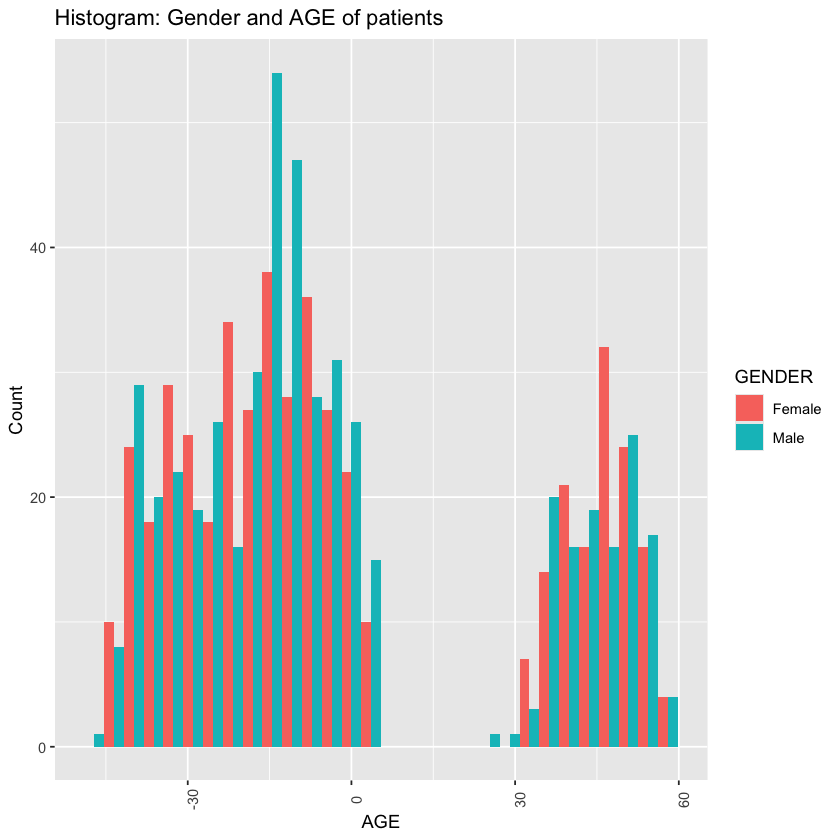

In [12]:
#Libraries
library(lubridate)
library(dplyr)
library(ggplot2)

# Calculate AGE
patients_clean <- patients_clean %>%
  mutate(
    AGE = if_else(
      !is.na(DEATHDATE),
      as.numeric(difftime(DEATHDATE, BIRTHDATE, units = "days")) / 365.25,
      as.numeric(difftime(Sys.Date(), BIRTHDATE, units = "days")) / 365.25
    )
  )

# Create the Histogram

ggplot(patients_clean, aes(x = AGE, fill = GENDER)) +
  geom_histogram(position = "dodge") +  
  labs(x = "AGE", y = "Count", title = "Histogram: Gender and AGE of patients") +
  theme(axis.text.x = element_text(angle = 90))



### Question 12
Make a scatterplot of birthdate by martial status.

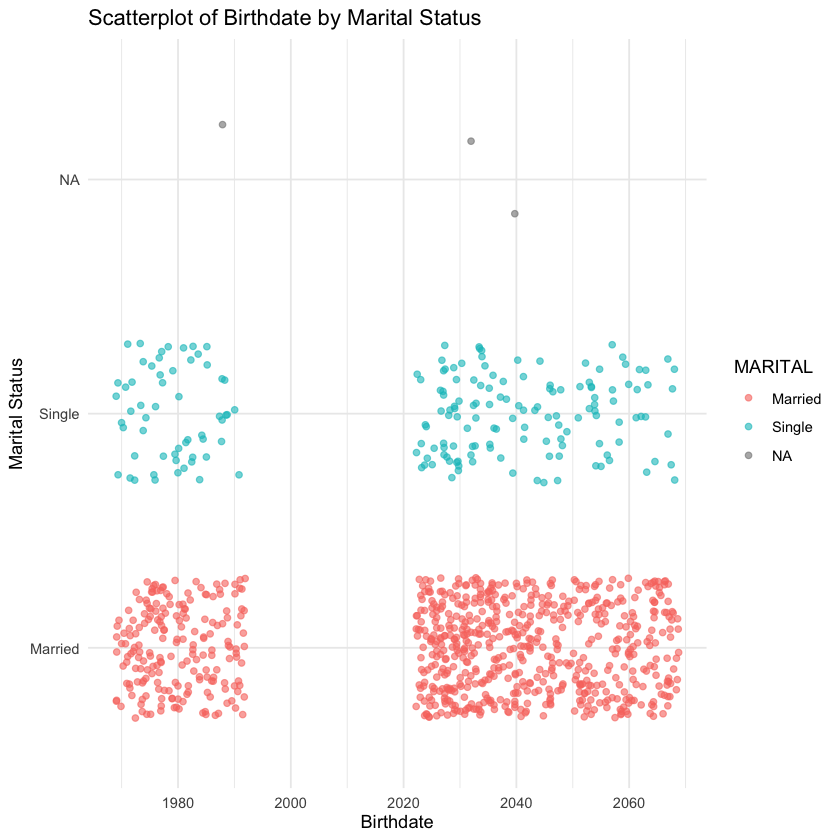

In [9]:
ggplot(patients_clean, aes(x = BIRTHDATE, y = MARITAL, color = MARITAL)) +
  geom_jitter(alpha = 0.6, width = 0, height = 0.3) +
  labs(
    title = "Scatterplot of Birthdate by Marital Status",
    x = "Birthdate",
    y = "Marital Status"
  ) +
  theme_minimal()